In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
#import face_recognition
from tqdm import tqdm_notebook
%matplotlib inline 
import cv2 as cv

In [2]:
DATA_FOLDER = 'E:/thesis code/deepfake-detection'
TRAIN_SAMPLE_FOLDER = 'E:/thesis code/deepfake-detection/train_sample_videos'
TEST_FOLDER = 'E:/thesis code/deepfake-detection/test_videos'

print(f"Train samples: {len(os.listdir(os.path.join(DATA_FOLDER, TRAIN_SAMPLE_FOLDER)))}")
print(f"Test samples: {len(os.listdir(os.path.join(DATA_FOLDER, TEST_FOLDER)))}")

Train samples: 402
Test samples: 400


In [3]:
train_list = list(os.listdir(os.path.join(DATA_FOLDER, TRAIN_SAMPLE_FOLDER))) #Looking into the train_sample_videos folder
ext_dict = []
for file in train_list:
    file_ext = file.split('.')[1]
    if (file_ext not in ext_dict):
        ext_dict.append(file_ext)
print(f"Extensions: {ext_dict}")
for file_ext in ext_dict:
    print(f"Files with extension `{file_ext}`: {len([file for file in train_list if  file.endswith(file_ext)])}")

IndexError: list index out of range

In [4]:
test_list = list(os.listdir(os.path.join(DATA_FOLDER, TEST_FOLDER))) #Looking into the test_videos folder
ext_dict = []
for file in test_list:
    file_ext = file.split('.')[1]
    if (file_ext not in ext_dict):
        ext_dict.append(file_ext)
print(f"Extensions: {ext_dict}")
for file_ext in ext_dict:
    print(f"Files with extension `{file_ext}`: {len([file for file in train_list if  file.endswith(file_ext)])}")

Extensions: ['mp4']
Files with extension `mp4`: 400


In [5]:
        
json_file = [file for file in train_list if  file.endswith('json')][0]
print(f"JSON file: {json_file}")
def get_meta_from_json(path):
    df = pd.read_json(os.path.join(DATA_FOLDER, path, json_file))
    df = df.T
    return df

meta_train_df = get_meta_from_json(TRAIN_SAMPLE_FOLDER)
meta_train_df.head()


JSON file: metadata.json


,label,split,original
aagfhgtpmv.mp4,FAKE,train,vudstovrck.mp4
aapnvogymq.mp4,FAKE,train,jdubbvfswz.mp4
abarnvbtwb.mp4,REAL,train,None
abofeumbvv.mp4,FAKE,train,atvmxvwyns.mp4
abqwwspghj.mp4,FAKE,train,qzimuostzz.mp4


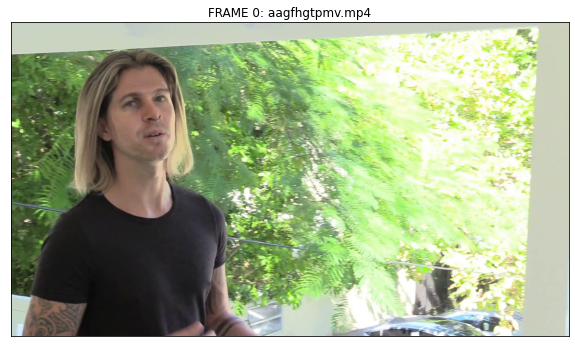

In [6]:
import cv2 as cv
import os
import matplotlib.pylab as plt
train_dir = 'E:/thesis code/deepfake-detection/train_sample_videos/'
fig, ax = plt.subplots(1,1, figsize=(10, 10))
train_video_files = [train_dir + x for x in os.listdir(train_dir)]
video_file = train_video_files[0]
#video_file = 'E:/thesis code/deepfake-detection/train_sample_videos/akxoopqjqz.mp4'
cap = cv.VideoCapture(video_file)
success, image = cap.read()
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cap.release()   
ax.imshow(image)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.title.set_text(f"FRAME 0: {video_file.split('/')[-1]}")
plt.grid(False)

In [ ]:
import cv2
import numpy as np
import os

# Playing video from file:
train_dir = 'E:/thesis code/deepfake-detection/train_sample_videos/'
train_video_files = [train_dir + x for x in os.listdir(train_dir)]
video_file = train_video_files[1]
cap = cv2.VideoCapture(video_file)

try:
    if not os.path.exists('E:/thesis code/deepfake-detection/train_sample_videos/frames'):
        os.makedirs('E:/thesis code/deepfake-detection/train_sample_videos/frames')
except OSError:
    print ('Error: Creating directory of data')

currentFrame = 0
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Saves image of the current frame in jpg file
    name = 'E:/thesis code/deepfake-detection/train_sample_videos/frames/frame' + str(currentFrame) + '.jpg'
    print ('Creating...' + name)
    cv2.imwrite(name, frame)

    # To stop duplicate images
    currentFrame += 1

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [ ]:
from mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt
img = cv2.cvtColor(cv2.imread('E:/thesis code/deepfake-detection/train_sample_videos/frames/frame0.jpg'), cv2.COLOR_BGR2RGB)
detector = MTCNN()
detections = detector.detect_faces(img)
detections
img_with_dets = img.copy()
min_conf = 0.9
for det in detections:
    if det['confidence'] >= min_conf:
        x, y, width, height = det['box']
        keypoints = det['keypoints']
        cv2.rectangle(img_with_dets, (x,y), (x+width,y+height), (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['left_eye']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['right_eye']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['nose']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['mouth_left']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['mouth_right']), 2, (0,155,255), 2)
plt.figure(figsize = (10,10))
plt.imshow(img_with_dets)
plt.axis('off')